# Simulatorische Untersuchung der gerichteten Perkolation

    01/2016 - 03/2016

    Universität Potsdam

    Christian Michaelis, Erik Mau

## I. Theoretische Einführung

Wir wollen gerichtete Kanten-Perkolation auf einem zwei-dimensionalen, rechteckigem Gitter untersuchen 
(Abb. 1). Die gerichteten Kanten zwischen den indizierten Gitterpunkten 
$A_{ti}\to A_{t+1i}$ sowie $A_{ti}\to A_{t+1 i+1}$ werden unabhaengig voneinander mit einer 
Wahrscheinlichkeit $0\le p\le 1$ gesetzt, und man sagt, das Gitter perkoliert, wenn eine 
gerichtete Verbindung zwischen zwei Gitterpunkten $A_{0i}$ und $A_{T_\textrm{max}j}$ ueber 
gesetzte Kanten existiert. Nimmt das Feld `A[t,i]` die Werte `1` und `0` an, jenachdem, 
ob ein gerichteter Pfad zwischen einem Gitterpunkt `A[0,:]` und `A[t,i]` existiert, 
so ergeben sich die entsprechenden Eintraege der Zeile `A[t+1,:]` allein aus der vorherigen 
Zeile `A[t,:]` und der Uebergangswahrscheinlichkeit $p$. Gerichtete Perkolation 
kann daher als iterativer Prozess `A[now,:]` $\to$ `A[nxt,:]` beliebig lange auf einem Feld 
mit zwei Zeilen simuliert werden, wenn die Indexvariablen `now` und `nxt` in jedem Schritt 
einfach vertauscht werden. Als Anfangbedingung gelte `A[0,:]=1`. Felder mit dem Wert `1` koennen auch als "aktiv" bezeichnet werden. In diesem Fall beschreibt gerichtete Perkolation einen Prozess, in dem ein aktiver Gitterpunkt in einem Zeitschritt einen Nachbarn aktivieren kann und, unabhaengig davon, selbst inaktiv werden kann.

In [ ]:
from IPython.display import Image
Image(filename="./DPFig.png", width=300)

Abbildung 1 : Ist ein Gitterpunkt zum Zeitpunkt $t$ aktiv, so bleibt er mit der Wahrscheinlichkeit $p$ in einem Zeitschritt aktiv und aktiviert, davon unabhaengig, seinen rechten Nachbarn ebenso mit einer Wahrscheinlichkeit $p$. Wechselt man in jedem Zeitschritt zwischen rechtem und linkem Nachbarn, vermeidet man eine mittlere Drift nach rechts.

Ein Perkolationsexperiment besteht aus der Simulation eines solchen Perkolationsprozesses bei gegebener Zeilenlaenge $N$ des Feldes `A[:,0:N-1]`, maximaler Simulationszeit $T_\textrm{max}$, sowie der Wahrscheinlichkeit $p$, dass ein Wert `A[now,i]==1` nach `A[nxt,i]` bzw. `A[nxt,mod(i+1,N)]` propagiert wird (hier mit periodischen Randbedingungen). Das Resultat des Experimentes sind Zahlen $(r_0,r_1,\dots r_k,r_\textrm{final},T_\omega)$, wobei $r_l$ der Anteil `sum(A[now,:])/float(N)` der "aktiven" Zellen zu den Zeitpunkten $t_l = 2^l < T_\textrm{max}$ und $t_\textrm{final}=T_\textrm{max}$ ist, und $T_\omega$ der erste Zeitpunkt, an dem keine Zellen mehr aktiv sind. Falls $T_\omega>T_\textrm{max}$ ist, soll der Wert $T_\omega=T_\textrm{max}+1$ angenommen werden. Ansonsten kann das Experiment nach $T_\omega$ abgebrochen werden, da fuer alle $t_l\ge T_\omega$ folgt $r_l=0$.

Die kritische Uebergangswahrscheinlichkeit $p_{cr}$ ergibt sich im Grenzfall sehr grosser Systeme $N\to\infty$ daraus, dass die Aktivitaet fuer $p<p_{cr}$ asymptotisch exponentiell gegen Null geht und fuer $p>p_{cr}$ bei einem von Null verschiedenen Wert saturiert. Am kritischen Punkt gilt $r(t)\sim t^{-\delta}$, allerdings nur solange $r\gg O(1/N)$.

## II. Aufgabenstellungen

**Achtung :** Versuchen Sie mit Feldern von ganzen Zahlen (`dtype=int`) zu arbeiten, 
und vermeiden Sie explizite Schleifen ueber Feldindizes, um einen moeglichst schnellen 
Python Code zu erhalten. Verwenden Sie vektorisierte Operationen, Indexnotationen und verschiedene 
Views ueber Felder.



- Schreiben Sie eine Funktion `r,Tohm,Pic = DPerc(N,p,Tmax,Tshow=0)`, welche ein Perkolationsexperiment durchfuehrt, und die Aktivitaeten $r_{l=0\dots k}$ und $r_\textrm{final}$ in einem Feld `r[0:k+2]` sowie $T_\omega$ als ganze Zahl `Tohm` zurueckliefert. Falls die ganze Zahl `Tshow` ungleich Null ist, so soll die Matrix `Pic[0:Tshow-1,0:N-1]` die ersten `Tshow` Zeilen des Experiments enthalten. Ansonsten wird `Pic=None` zurueckgeliefert.
- Experimentieren Sie mit verschiedenen Werten von $p$ und $N$, und erzeugen Sie Bilder von `Pic`, welche das das Systemverhalten gut repraesentieren. **Hinweis :** Sie koennen das Programm so modifizieren, dass die Drift in Richtung groesserer Spalten eliminiert wird und die Bilder symmetrischer aussehen.
- Beschreiben Sie Ihre Beobachtungen mit Bezug auf die Bilder.

- Fuehren Sie Perkolationsexperimente in grossen Systemen $N$ ueber lange Zeitraeume $T_\textrm{max}$ durch, und plotten Sie `r[0:k+1]` doppelt logarithmisch gegen die Zeiten $t_{l=0\dots k}=2^l$. Grenzen Sie die kritische Uebergangswahrscheinlichkeit so genau ein, wie es Ihnen in vertretbarer Zeit moeglich ist, und bestimmen Sie zusaetzlich den Exponenten $\delta$ durch lineare Regression im log-log plot.
- Bestimmen Sie fuer Uebergangswahrscheinlichkeiten $p>p_{cr}$ die Aktivitaet $r(p)$, bei der der Perkolationsprozess saturiert, plotten Sie diese als Funktion von $|p-p_{cr}|$ doppelt logarithmisch, und bestimmen Sie $\beta$ unter der Annahme $r(p)\sim |p-p_{cr}|^\beta$.
- Schreiben Sie eine Funktion `r, Tohm = PercStats(N,p,Tmax,anz)`, welche `anz` Perkolationsexperimente durchfuehrt, und im Feld `r[0:k+1]` den *Median* der Aktivitaeten zu den Zeitpunkten $t_{l=0\dots k}=2^l<T_\textrm{max}$ sowie $t_\textrm{final}=T_\textrm{max}$, und in `Tohm` den *Median* der Zeiten $T_\omega$ zurueckliefert. Der Median ist das `anz/2`-kleinste Ergebnis in einer Serie aus `anz` Experimenten.
- Schreiben Sie ein Programm, welches die Funktion `PercStats(N,p,Tmax,anz)` fuer jeden Wert $p_\textrm{min}\le p_n\le p_\textrm{max}$ einer feinen Diskretisierung eines Intervals von Wahrscheinlichkeiten aufruft, und die Ergebnisse zeilenweise in einer Datei ausgibt. Die erste Zeile der Datei soll als Kommentar die Form 
`# N=..., Tmax=..., anz=...`
haben, und jede weitere Zeile soll als ersten Eintrag den Wert $p_n$ zu stehen haben, fuer den die Statistik erstellt wurde. 

**Hinweis :** Benutzen Sie den Befehl `file.flush()`, um waehrend die Simulation laeuft das Schreiben in die Datei zu erzwingen.

- Lassen Sie das Programm ueber einem interessanten Intervall von Wahrscheinlichkeiten mit hinreichend grosser Anzahl `anz` von Experimenten an jedem Punkt laufen. Erzeugen Sie Dateien fuer $N=128, 256, 512$ und $1024$, sowie $T_\textrm{max}=16N$, und plotten Sie $r_\textrm{final}(p)$, sowie $T_\omega(p)$.

**Zusatzaufgabe :**

- Wiederholen Sie den Versuch mit der Aenderung, dass nicht nur der jeweils rechte Nachbar aktiviert werden kann, sondern unabhaengig davon auch der linke.

## III. Erläuterung der verwendeten Funktionen

In [1]:
import numpy as np
import matplotlib.pyplot as py
from IPython.display import Image
%matplotlib inline

In [2]:
def update(A,ids,p):
    l=len(A)
    ku=(np.random.rand(l)<p).astype(np.int)
    ks=(np.random.rand(l)<p).astype(np.int)
    return(A*ku)|(A[ids]*ks) 

def perex(N,p,pa,Tmax):
    A=(np.random.rand(N)<pa).astype(np.int)
    counter=0
    while (sum(A)>0) and (counter<Tmax):
        ids= (np.arange(N)+(-1)**counter) % N
        yield A
        A=update(A,ids,p)
        counter +=1
        
def DPerc(N=100,p=0.5,pa=1,Tmax=10000,Tshow=0):
    epic = list(perex(N,p,pa,Tmax))
    l = len(epic)

    if l == Tmax:
        Tohm = Tmax +1
    else: Tohm = l
        
    if Tshow>0:
        Pic = epic[0:Tshow+1]
    else: Pic = None

    k=int(np.log(l)/np.log(2))
    r=[np.mean(epic[2**i]) for i in range(k)]
    r.extend([np.mean(epic[l-1])])   

    return  r,Tohm,Pic

Perkolationsexperiment (Aktivierung nur eines Nachbars)
    - als Komplex zu betrachten
    - aus dem bisherigen Aktivitätsfeld A wird die neue Aktivtät berechnet
    - Propagation mit Wahrscheinlichkeit p ... 
            - ... nach unten
            - ... zur Seite (abhängig von der Indizierungsliste ids)

    - Modularisierung aufgrund besserer Testbarkeit

In [3]:
def DPerc2(N=100,p=0.5,pa=1,Tmax=10000,Tshow=0):
    epic = list(perex2(N,p,pa,Tmax))
    l = len(epic)

    if l == Tmax:
        Tohm = Tmax +1
    else: Tohm = l
        
    if Tshow>0:
        Pic = epic[0:Tshow+1]
    else: Pic = None

    k=int(np.log(l)/np.log(2))
    r=[np.mean(epic[2**i]) for i in range(k)]
    r.extend([np.mean(epic[l-1])])   

    return  r,Tohm,Pic



def perex2(N,p,pa,Tmax):
    idl=(np.arange(N)+(-1)) % N
    idr=(np.arange(N)+(1)) % N

    def update2(A,p):
        l=len(A)
        ku=(np.random.rand(l)<p).astype(np.int)
        kl=(np.random.rand(l)<p).astype(np.int)
        kr=(np.random.rand(l)<p).astype(np.int)
        return(A*ku)|(A[idl]*kl | A[idr]*kr)

    A=(np.random.rand(N)<pa).astype(np.int)
    counter=0
    while (sum(A)>0) and (counter<Tmax):
        yield A
        A=update2(A,p)
        counter +=1

In [12]:
def polyfit(x,y,N=0):
    b=np.array(y)
    a=np.array(x)
    A=np.array([a**i for i in range(N+1)]).T
    
    c=np.linalg.solve(A.transpose().dot(A),A.transpose().dot(b))
    return c
    
    
def evaluate(x,y,grade=0):
    
    if not grade==None:
        M=polyfit(x,y,grade)
        wb= sum(((x**i)*M[i]) for i in range(len(M)))
        fehler= np.mean(abs(y-wb))
    else: 
        M=None
        wb=None
        fehler=None
            
    D={"yregr":wb,"fehler":fehler,"coeffs":M}
    
    return D

Regressionsberechner
    - erstellt für gegebene Datensätze (x,y) das Polynom N-ten Grades, das diesen mit der geringsten (quadratischen) 
    Abweichung annähert
    - gibt in c die Koeffizienten dieses Polynoms zurück
    
Auswerter

    - bekommt die Daten eines Perkolationsexperiments als Eingabe
    - wertet diese anhand des gewählten Regressionsgrads aus
    - liefert Dictionary mit Angaben über die Auswertung zurück (Mittlerer Fehler, Koeffizienten des Regressionspolynoms etc.)

In [5]:
def nowplot(r,Tohm,Pic,title="",anz=1, plottype="lin",grade=None,regr_k=0):
    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    
    if plottype=="lin":
        py.ylim([0,1])
    elif plottype == "log":   
        py.ylim([-9,0.5])
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)

    D=evaluate(x,r,grade=grade)    
   
    py.plot(x,r,label="Aktivität")
    if not grade==None:
        py.plot(x,D["yregr"],label="Regression: h.Koeff: {})".format(round(D["coeffs"][len(D["coeffs"])-1],4)))
    py.legend(loc=0)
    py.ylabel("Aktivität")
    py.xlabel("Zeitschritt")
    py.title(title + " ({}.)".format(plottype))
    py.show()
    
    if not(Pic is None):
        py.imshow(Pic, interpolation= "nearest", aspect = "auto", cmap = "Blues")
        py.ylabel("Zeitschritt")
        py.xlabel("Zellposition")
        py.show()
    print("Inaktivität erreicht nach {} Zeitschritten".format(Tohm))
    
    if not D["fehler"]==None:
        print("Mittlere Abweichung: {}".format(round(D["fehler"],4)))

    return

Plotter

    - plottet ein Perkolationsexperiment
    - Logarithmierung der Wertepaare statt Anpassung der Achsen zwecks Übergabe an Regression


In [6]:
def PercStats (N,p,Tmax,anz):
    T = [0 for i in range(anz)]
    a=[[] for i in range(anz)]
    
    for i in range(anz):
        a[i],T[i],Pic= DPerc(p=p,pa=1,Tmax=Tmax,N=N,Tshow=0) 
    
    l = max(len(a[i]) for i in range(anz))
    
    data=np.zeros((anz,l))
    
    for i in range(anz):
        b=np.array(a[i])
        b.resize(l)
        data[i]=b
    
    r=np.zeros(l)
    
    for i in range(l):
        r[i]=np.median(data[:,i])
    
    Tohm=np.median(np.array(T))
    
    return r, Tohm

In [91]:
tmax=2047
k=int(np.log(tmax)/np.log(2))
print(k)
print(2**k)

10
1024


## IV. Untersuchungen bei Aktivierung nur einer Nachbarzelle

### Experimente zu verschiedenen Übergangswahrscheinlichkeiten $p$

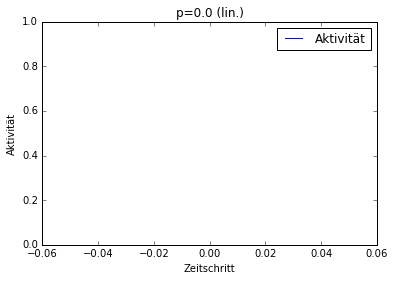

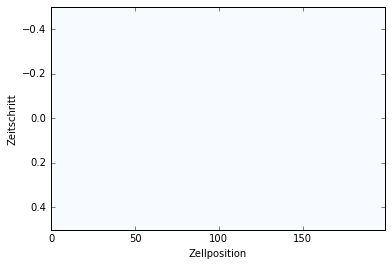

Inaktivität erreicht nach 1 Zeitschritten
---------------------------------------------------


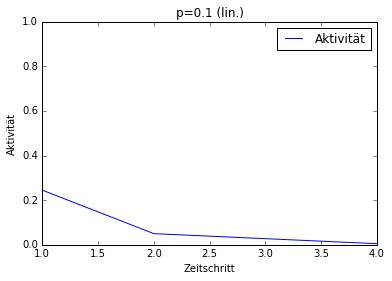

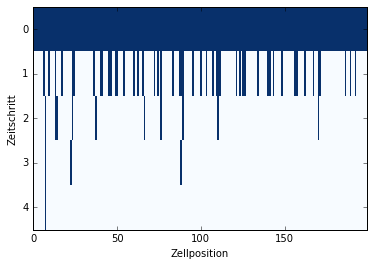

Inaktivität erreicht nach 5 Zeitschritten
---------------------------------------------------


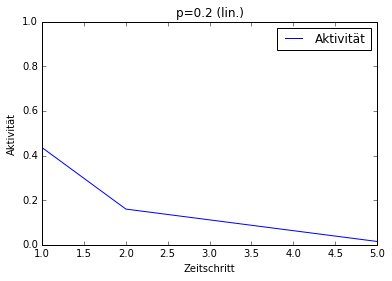

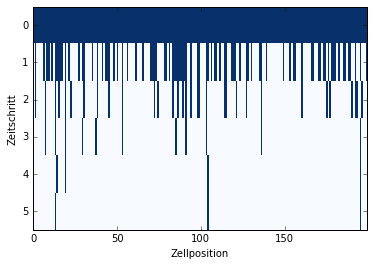

Inaktivität erreicht nach 6 Zeitschritten
---------------------------------------------------


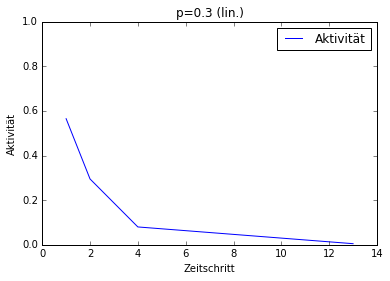

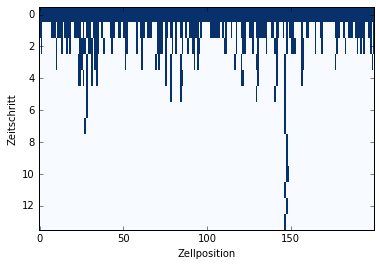

Inaktivität erreicht nach 14 Zeitschritten
---------------------------------------------------


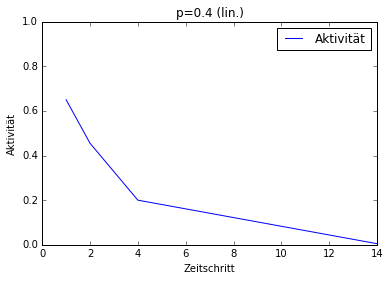

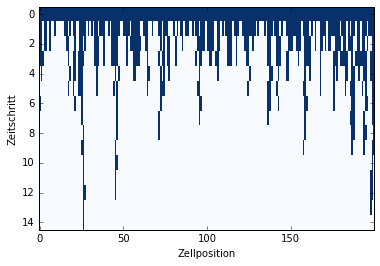

Inaktivität erreicht nach 15 Zeitschritten
---------------------------------------------------


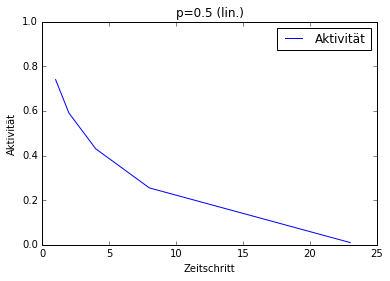

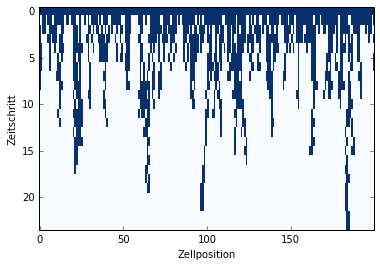

Inaktivität erreicht nach 24 Zeitschritten
---------------------------------------------------


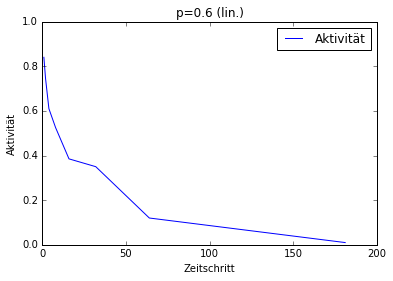

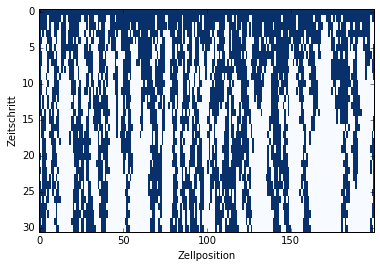

Inaktivität erreicht nach 182 Zeitschritten
---------------------------------------------------


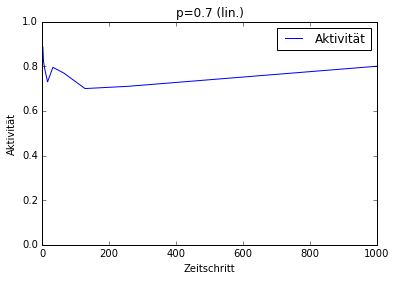

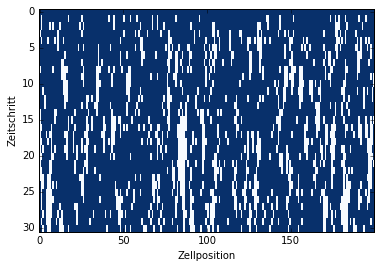

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


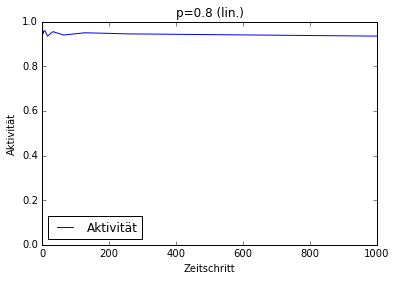

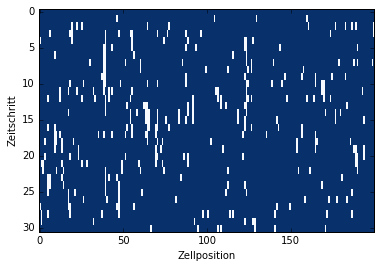

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


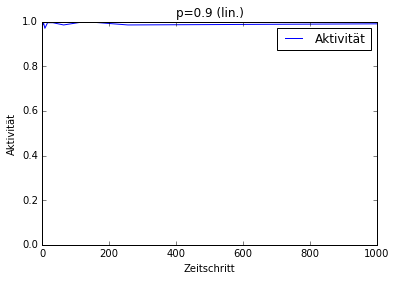

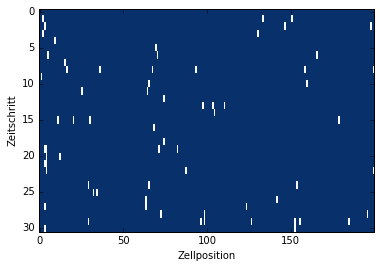

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


In [14]:
N=200
Tmax=1000
Tshow=30
anz=10

for i in range(anz):
    p=round(i/anz,3)
    nowplot(*DPerc(p=p,pa=1,Tmax=Tmax,N=N,Tshow=Tshow),title="p={}".format(p),plottype="lin")
    print("---------------------------------------------------")

### Experimente zu verschiedenen Schichtgrößen $N$

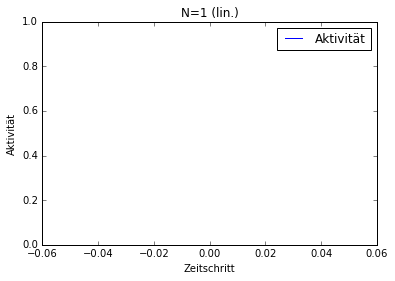

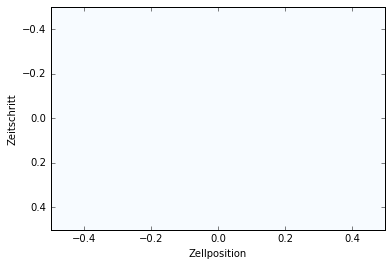

Inaktivität erreicht nach 1 Zeitschritten
---------------------------------------------------


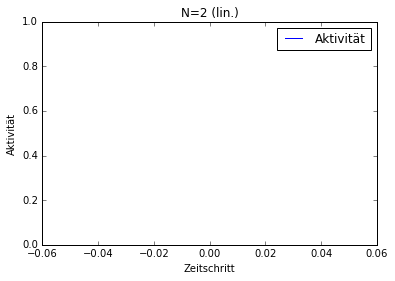

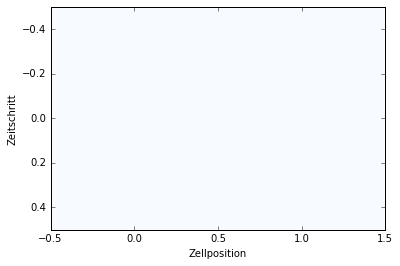

Inaktivität erreicht nach 1 Zeitschritten
---------------------------------------------------


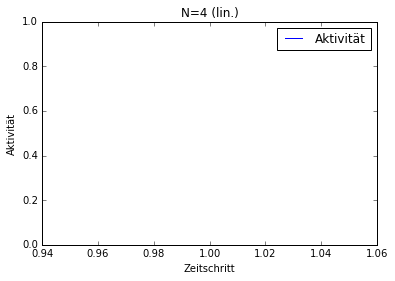

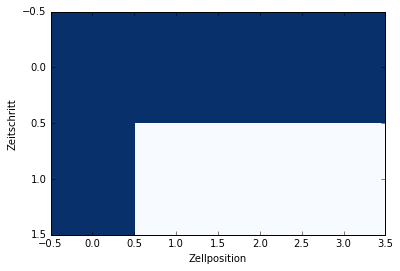

Inaktivität erreicht nach 2 Zeitschritten
---------------------------------------------------


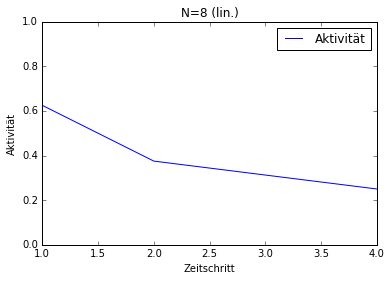

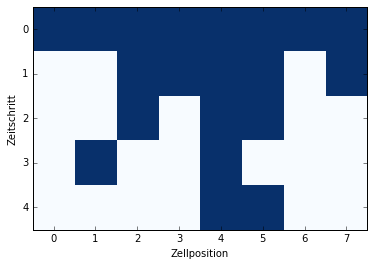

Inaktivität erreicht nach 5 Zeitschritten
---------------------------------------------------


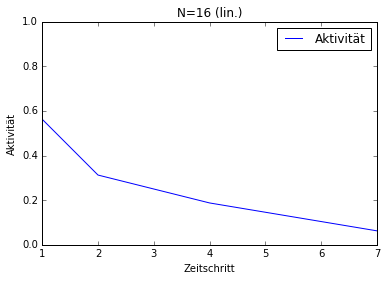

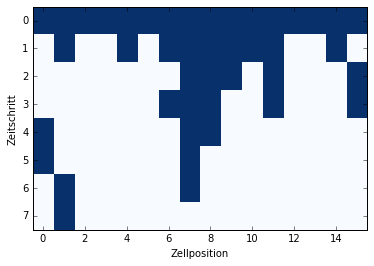

Inaktivität erreicht nach 8 Zeitschritten
---------------------------------------------------


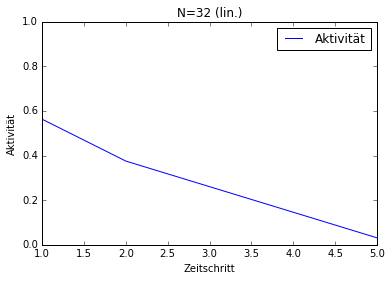

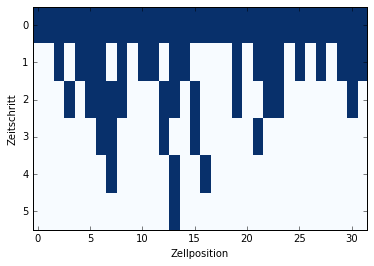

Inaktivität erreicht nach 6 Zeitschritten
---------------------------------------------------


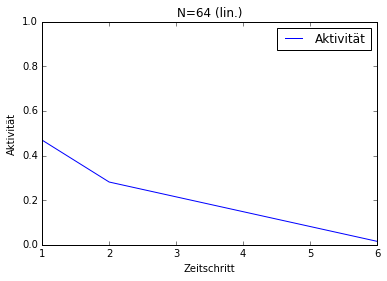

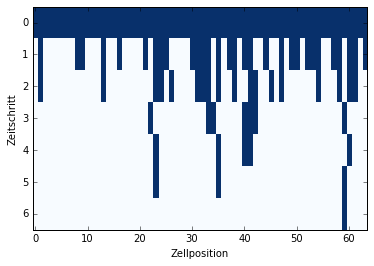

Inaktivität erreicht nach 7 Zeitschritten
---------------------------------------------------


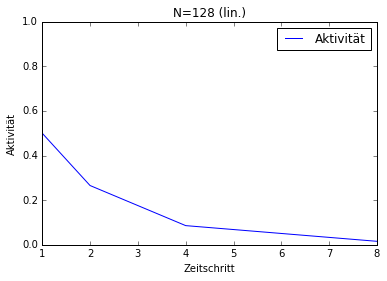

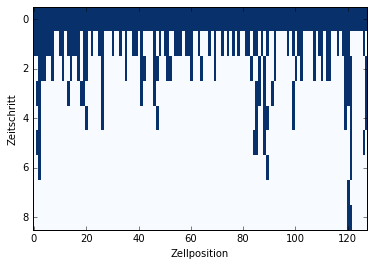

Inaktivität erreicht nach 9 Zeitschritten
---------------------------------------------------


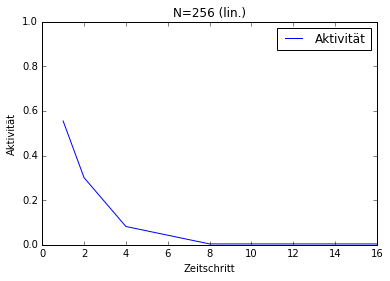

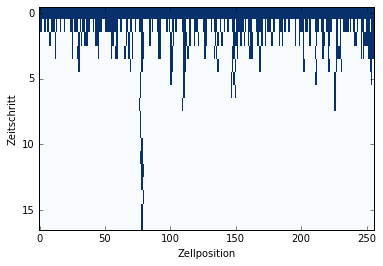

Inaktivität erreicht nach 17 Zeitschritten
---------------------------------------------------


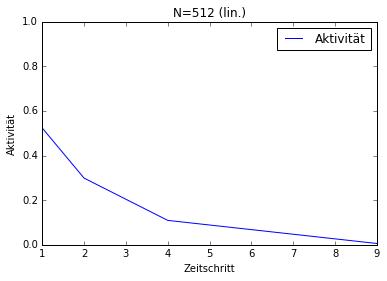

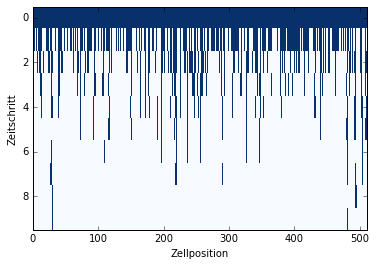

Inaktivität erreicht nach 10 Zeitschritten
---------------------------------------------------


In [13]:
p=0.3
Tmax=1000
Tshow=30
anz=10

for i in range(anz):
    N=2**i
    nowplot(*DPerc(p=p,pa=1,Tmax=Tmax,N=N,Tshow=Tshow),title="N={}".format(N),plottype="lin")
    print("---------------------------------------------------")

### Experimente zu verschiedenen Abbruchszeiten $T_{max}$

### Grenzwahrscheinlichkeit $p_{cr}$

Die Aktivität bei der Grenzwahrscheinlichkeit $p_{cr}$ soll im doppelt-logarithmisch mit der Basis $a$ aufgetragenen Plot laut Annahme linear regressierbar sein. Eine entsprechend gefundene lineare Regressionsfunktion mit den Koeffizienten $m$ und $n$ nähert dann folgenden Zusammenhang an: 

$\log_{a}(r(t))=m\cdot\log_{a}{t}+n \qquad \Leftrightarrow \qquad r(t) = t^m \cdot  e^{n\ln{a}}$ 

Daraus lässt sich $r(t)\sim t^{-\delta}$ mit $\delta=-m$ ableiten.

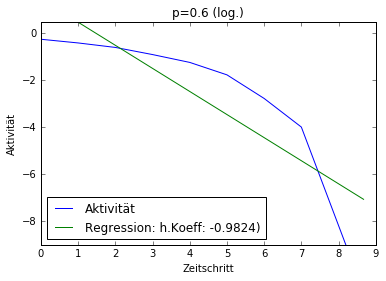

Inaktivität erreicht nach 409 Zeitschritten
Mittlere Abweichung: 1.4701


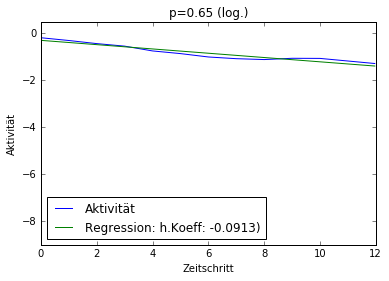

Inaktivität erreicht nach 4001 Zeitschritten
Mittlere Abweichung: 0.0964


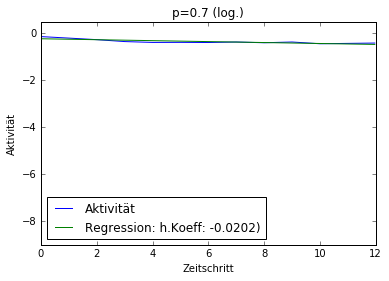

Inaktivität erreicht nach 4001 Zeitschritten
Mittlere Abweichung: 0.0409


In [26]:
Tmax=4000
N=2048
nowplot(*DPerc(p=0.600,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.600),plottype="log",grade=1)
nowplot(*DPerc(p=0.65,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.65),plottype="log",grade=1)
nowplot(*DPerc(p=0.700,pa=1,Tmax=Tmax,N=N,Tshow=0),title="p={}".format(0.700),plottype="log",grade=1)

Wie in den beiden obigen Darstellungen grob zu erkennen ist, liegt der gesuchte Grenzfall zwischen den gezeigten Beispielen: $0,6 \leq p_{cr} \leq 0,7$ 

Es kann beobachtet werden, dass bei wachsendem $N$ auch $T_{\omega}$ wächst. Um also bei der folgenden Untersuchung der Grenzwahrscheinlichkeit die stärker werdenden Schwankungen nahe einer entsprechend kleinen Aktivität ausblenden zu können, wird $T_{max}$ im Vergleich zu $N$ signifikant kleiner gewählt, als dies im obigen Experimentierverlauf der Fall war.

#### Eingrenzung der Grenzwahrscheinlichkeit:

Im Folgenden wird in einem festgelegten Intervall um die vermutete Grenzwahrschienichkeit $p_{cr}$ der Anstieg und die mittlerer Abweichung der jeweiligen Regressionsgeraden (Polynom 1. Grades) geplotet.

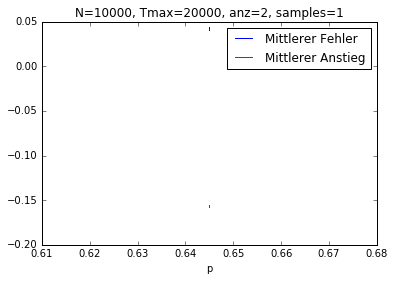

In [51]:
anz=30
samples=2
start=0.2
end=0.3
Tmax=20000
N=10000

Ax=np.linspace(start,end,anz)
fehler=[0 for i in range(anz)]
m=[0 for i in range(anz)]


for i in range(anz):
    for j in range(samples):
        r,Tohm,Pic=DPerc(p=Ax[i],pa=1,Tmax=Tmax,N=N,Tshow=0)
        
        x=np.linspace(0,len(r)-2,len(r)-1)
        x=np.append(2**x,np.array([Tohm-1]))
    
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)   
        
        D=evaluate(x,r,grade=1)
        
        fehler[i] += D["fehler"]
        m[i] += D["coeffs"][1]
    
    #print(i/anz*100)  #Prozentanzeige
        
fehler=np.array(fehler)/samples
m=np.array(m)/samples

py.plot(Ax,fehler,label="Mittlerer Fehler")
py.plot(Ax,m,label="Mittlerer Anstieg")
py.title("N={}, Tmax={}, anz={}, samples={}".format(N,Tmax,anz,samples))
py.xlabel('p')
py.legend(loc=0)
py.savefig('.\data\one_neighbor\cruc_prob\cruc_prob_{}_{}.png'.format(start,end), bbox_inches='tight')
py.show()

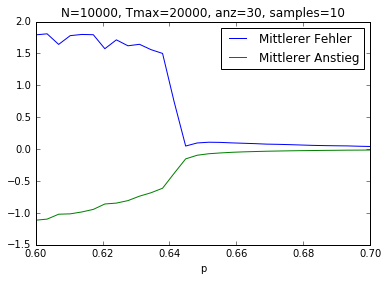

In [54]:
Image(filename="data\one_neighbor\cruc_prob\cruc_prob_0.6_0.7.png")

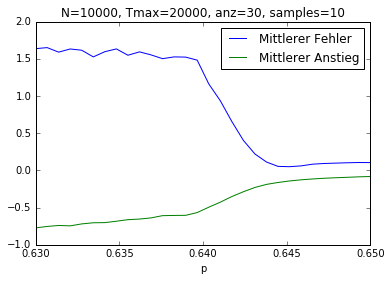

In [18]:
Image(filename="data\one_neighbor\cruc_prob\cruc_prob_0.63_0.65.png")

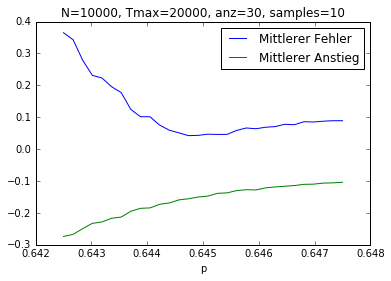

In [19]:
Image(filename="data\one_neighbor\cruc_prob\cruc_prob_0.6425_0.6475.png")

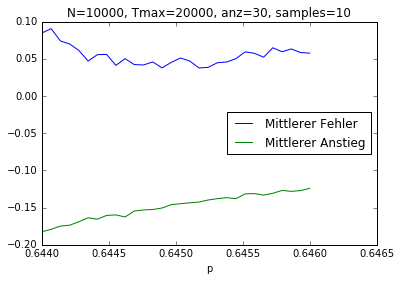

In [21]:
Image(filename="data\one_neighbor\cruc_prob\cruc_prob_0.644_0.646.png")

$p_{cr}$ wird aufgrund der obigen Beobachtungen auf $0.645 \pm 0.001$ geschätzt.


In [7]:
p_cr=0.645

Nahezu derselbe Code wird im Folgenden dazu verwendet, $\delta$ aus dem Mittelwert der Regressionsgeradenanstiege der Einzelexperimente zu bestimmen. 

In [8]:
samples=1
Tmax=20000
N=10000
fehler=0
m=0

for j in range(samples):
    r,Tohm,Pic=DPerc(p=p_cr,pa=1,Tmax=Tmax,N=N,Tshow=0)

    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    
    x=np.log(x)/np.log(2)
    r=np.log(r)/np.log(2)   
        
    D=evaluate(x,r,grade=1)
    fehler += D["fehler"]
    m += D["coeffs"][1]
        
fehler=fehler/samples
m=m/samples

print("Mittlere Abweichung: {}".format(round(fehler,4)))
print('Mittlerer Anstieg : {}'.format(round(m,4)))

Mittlere Abweichung: 0.0433
Mittlerer Anstieg : -0.1441


### Übergangswahrscheinlichkeiten oberhalb von $p_{cr}$

Analog zur Betrachtung im vorigen Kapitel trifft auch hier folgende Überlegung zu: Sollte im doppelt-logartithmischen Plot ein linearer Zusammenhang bestehen, dann gilt:

$\log_{a}(r(p))=m\cdot\log_{a}{|p-p_{cr}|}+n \qquad \Leftrightarrow \qquad r(p) = |p-p_{cr}|^m \cdot  e^{n\ln{a}}$ 

Woraus ersichtlich ist, dass $r(p)\sim |p-p_{cr}|^{\beta}$ mit $\beta=m$ .

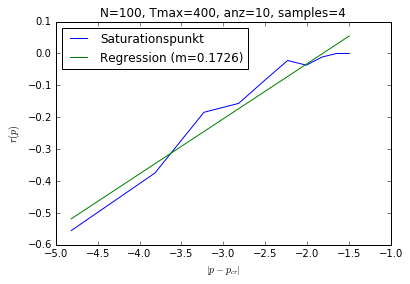

In [14]:
anz=10
samples=4
Tmax=400
N=100

Ax=np.linspace(1.0,p_cr,anz,endpoint=False)
a=[0 for i in range(anz)]
x=abs(Ax-p_cr)
x=np.log(x)/np.log(2)

for i in range(anz):
    for j in range(samples):
        r,Tohm,Pic=DPerc(p=Ax[i],pa=1,Tmax=Tmax,N=N,Tshow=0)
        a[i] += np.log(r[len(r)-1])/np.log(2) 
    
a=np.array(a)/samples

D=evaluate(x,a,grade=1)
py.plot(x,a,label="Saturationspunkt")
py.plot(x,D["yregr"],label="Regression (m={})".format(round(D["coeffs"][1],4)))
py.title("N={}, Tmax={}, anz={}, samples={}".format(N,Tmax,anz,samples))
py.xlabel('$|p-p_{cr}|$')
py.ylabel('$r(p)$')
py.legend(loc=0)
py.savefig('.\data\one_neighbor\higher_prob\higher_prob.png', bbox_inches='tight')
py.show()

In [ ]:
Ax=np.linspace(p_cr,1.0,20)-p_cr
print(Ax)

In [ ]:
r, T = PercStats(10000,0.3,20000,30)
print(r)
print(T)

In [85]:
def PerDat(N,Tmax, pmin, pmax, samples, anz):
    f = open('./data/one_neighbor/intervals/interval_{}_{}-{}.dat'.format(N, pmin, pmax),'w')
    f.write('# N={}, Tmax={}, anz={}\n'.format(N,16*N,anz))
    
    for p in np.linspace(pmin,pmax,samples) :
        r, Tohm = PercStats(N, p, Tmax, anz)
        f.write("{:10.6f} ".format(p))
        f.write("{:10.2f} ".format(Tohm))
        for i in range(len(r)):
            f.write("{:10.6f} ".format(r[i]))
        f.write("\n")
    
    f.close()


    #for p in np.linspace(pmin, pmax, sample):
        #f.write(str(p)+" ")
        #f.write("{.2f} ".format(r[i]))    dec.Decimal(r[i])
        #gerundet = [(round(dec.Decimal(r[i])), 3) for i in range(len(r))]
        #

In [86]:
N=128
PerDat(N,16*N,0.1,0.2,50,3)

In [87]:
N=128
pmin=0.1
pmax=0.2
data=np.loadtxt('./data/one_neighbor/intervals/interval_{}_{}-{}.dat'.format(N, pmin, pmax))
print(data)

ValueError: Wrong number of columns at line 5

## V. Untersuchungen bei Aktivierung beider Nachbarzellen

### Experimente zu verschiedenen Übergangswahrscheinlichkeiten $p$

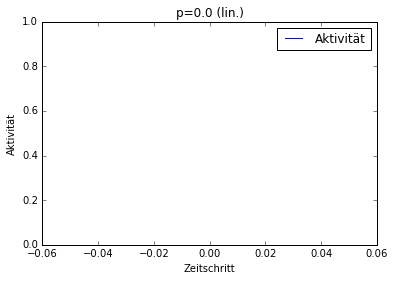

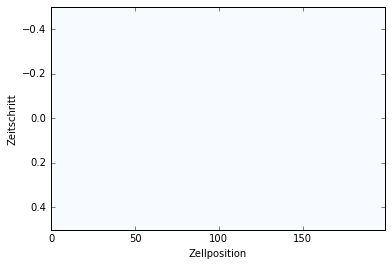

Inaktivität erreicht nach 1 Zeitschritten
---------------------------------------------------


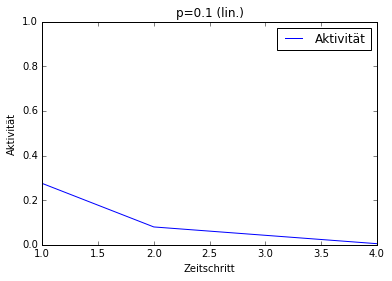

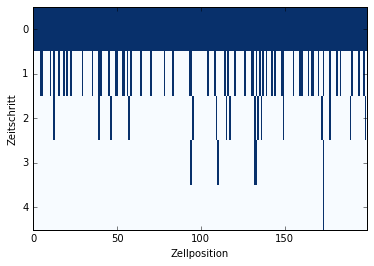

Inaktivität erreicht nach 5 Zeitschritten
---------------------------------------------------


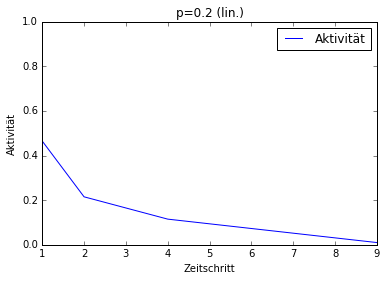

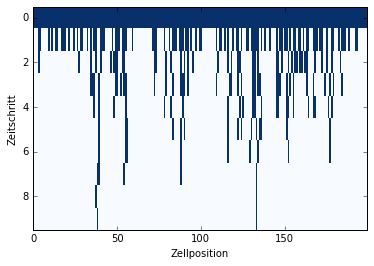

Inaktivität erreicht nach 10 Zeitschritten
---------------------------------------------------


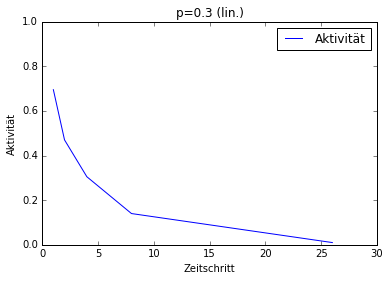

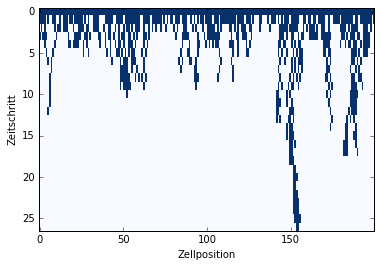

Inaktivität erreicht nach 27 Zeitschritten
---------------------------------------------------


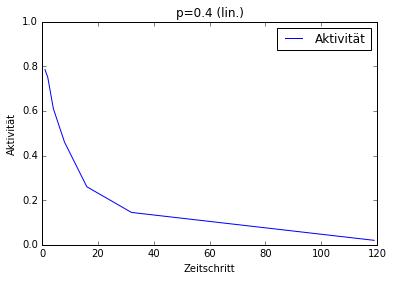

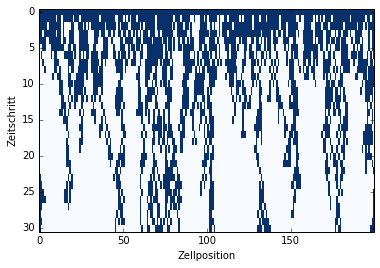

Inaktivität erreicht nach 120 Zeitschritten
---------------------------------------------------


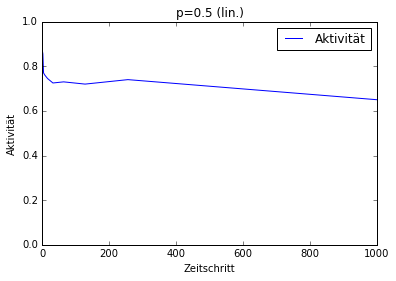

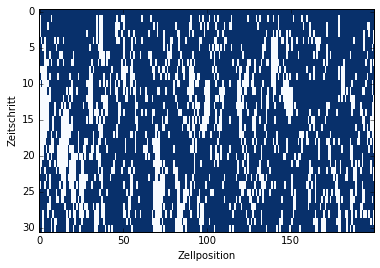

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


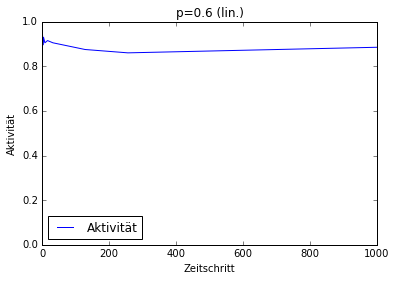

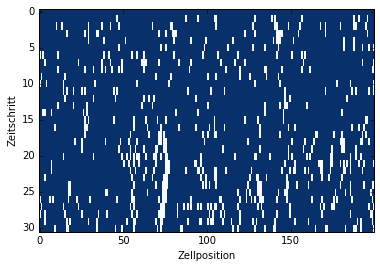

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


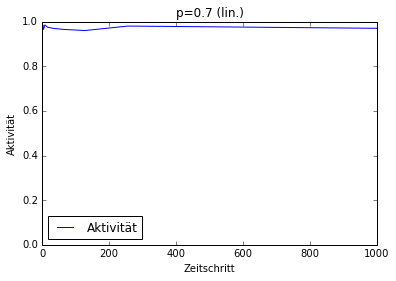

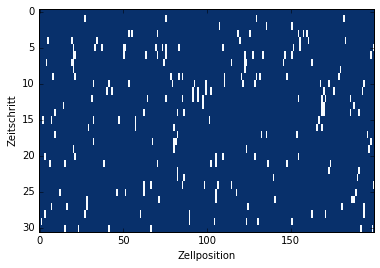

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


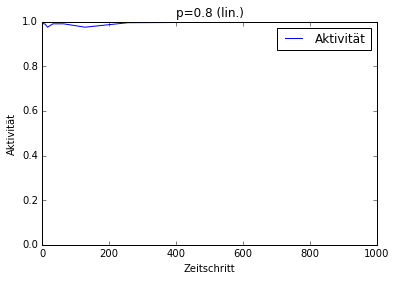

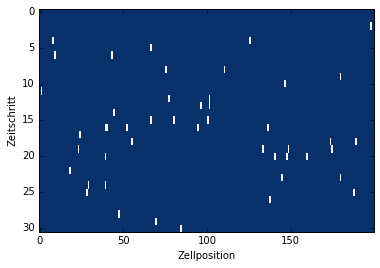

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


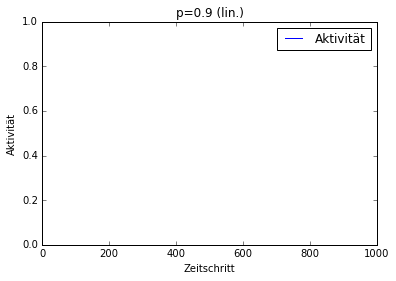

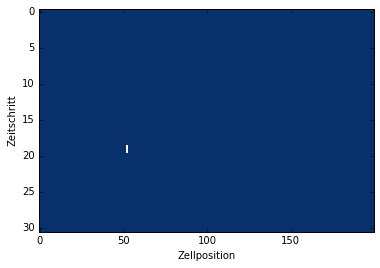

Inaktivität erreicht nach 1001 Zeitschritten
---------------------------------------------------


In [15]:
N=200
Tmax=1000
Tshow=30
anz=10

for i in range(anz):
    p=round(i/anz,3)
    nowplot(*DPerc2(p=p,pa=1,Tmax=Tmax,N=N,Tshow=Tshow),title="p={}".format(p),plottype="lin")
    print("---------------------------------------------------")

### Experimente zu verschiedenen Systemgrößen $N$

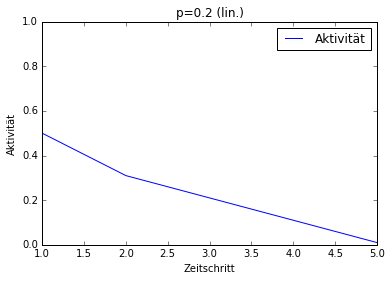

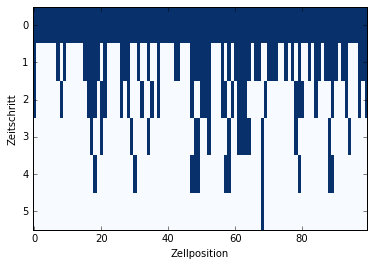

Inaktivität erreicht nach 6 Zeitschritten


In [36]:
p=0.2
N=100
Tmax=40
Tshow=50
nowplot(*DPerc2(p=p,pa=1,Tmax=Tmax,N=N,Tshow=Tshow),title="p={}".format(p),plottype="lin")

### Experimente zu verschiedenen Abbruchszeiten $T_{max}$

### Grenzwahrscheinlichkeit $p_{cr_{2}}$

### Übergangswahrscheinlichkeiten oberhalb von $p_{cr_2}$

How-to-Datei-schreiben:

In [ ]:
import numpy as np
s2=0.1
m=0.01

Nn = np.array([1,10,50,100,500,1000])
Nmax=max(Nn)

f = open('single_particle_random_walks.dat','w')
f.write('#200 single particle positions at 6 different time steps\n')
f.write('# nr. x(n) for n=')
for n in Nn :
    f.write(str(n)+" ")
f.write("\n#\n")

for nr in range(200) :
    f.write(str(nr)+" ")
    x = np.cumsum( (np.random.rand(Nmax)-0.5) * np.sqrt(s2) + m )
    for n in Nn :
        f.write("{:10.5f} ".format(x[n-1]))
    f.write("\n")
    
f.close()

Alter (Experimentier-)Kram:

In [ ]:
D= list(perex(N=10))
print(len(D))
f=[np.mean(D[i]) for i in range(len(D))]
print(f) 

In [ ]:
def  DPercPic(N=100,p=0.5,pa=0.5,Tmax=50000,Tshow=0):
    A=(np.random.rand(N)<pa).astype(np.int)
    counter=0
    r=np.mean(A)
    
    while (sum(A)>0) and (counter<Tmax):
        ids= (np.arange(N)+(-1)**counter) % N
        yield A
        A=update(A,ids,p=p)


In [ ]:
S = list(DPercPic(p=0.6,pa=0.1,Tmax=20000,N=1000))
py.imshow(S, interpolation= "nearest", aspect = "auto", cmap = "Blues" )
py.show()

In [ ]:
a=np.array([1,1,1,1,1,1,1])
b=np.array([2,2,2,2,2,2,2])
fehler=(sum(abs((a-b)**2))
print(fehler)

In [ ]:
def nowplot_alt(r,Tohm,Pic,title="",anz=1, plottype=0,regr=None,regr_k=0):
    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    

    if plottype==0:
        py.ylim([0,1])
    elif plottype == 1:
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)   
        py.ylim([-9,0])
    '''Logarithmierung der Wertepaare statt Anpassung der Achsen zwecks Übergabe an Regression'''    
    
    
    if not regr==None:
        M=polyfit(x,r,regr)
        wb2= sum(((x**i)*M[i]) for i in range(len(M)))
        fehler= np.mean(abs(r-wb2))
        py.plot(x,wb2,label="Regression") # (h.Koeff: {})".format(round(M[len(M)-1],4)))
         #idn=np.arange(len(r))#-regr_k)
        #db=x[idn]
        #wb=r[idn]
        #wb2=[sum(((db[j]**i)*M[i]) for i in range(len(M)) for j in range(len(db)))]
    else: fehler=None
    
    py.plot(x,r,label="Aktivität")
    py.legend(loc=0)
    py.title(title)
    py.show()
    
    if not(Pic is None):
        py.imshow(Pic, interpolation= "nearest", aspect = "auto", cmap = "Blues" )
        py.show()
    print("Inaktivität erreicht nach {} Zeitschritten".format(Tohm))
    
    if not fehler==None:
        print("Mittlere Abweichung:{}".format(round(fehler,4)))

    return

In [ ]:
def evaluate_old(r,Tohm,plottype="lin",grade=0):
     
    x=np.linspace(0,len(r)-2,len(r)-1)
    x=np.append(2**x,np.array([Tohm-1]))
    
    if plottype == "log":
        x=np.log(x)/np.log(2)
        r=np.log(r)/np.log(2)   
    '''Logarithmierung der Wertepaare statt Anpassung der Achsen zwecks Übergabe an Regression'''
        
    if not grade==None:
        M=polyfit(x,r,grade)
        wb= sum(((x**i)*M[i]) for i in range(len(M)))
        fehler= np.mean(abs(r-wb))
    else: 
        M=None
        wb=None
        fehler=None
            
    D={"x":x,"y":r,"yregr":wb,"Tohm":Tohm,"fehler":fehler,"plot":plottype,"coeffs":M}
    return D
